# PROJECT ON TEACHING ASSISTANT EVALUATION

### Importing Required libraries

In [16]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as plt  
import pandas as pd  

### Getting the DataSet

In [17]:
#importing datasets  
data_set= pd.read_csv('class.csv')  
  

### Shape of dataSet

In [18]:
data_set.shape

(151, 6)

In [19]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Native English Speaker  151 non-null    int64
 1   Course Instructor       151 non-null    int64
 2   Course                  151 non-null    int64
 3   Summer or regular       151 non-null    int64
 4   Class size              151 non-null    int64
 5   Class attribute         151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


### Printing the Head of dataset

In [20]:
data_set.head()

,Native English Speaker,Course Instructor,Course,Summer or regular,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


### Extracting dependent and independent Variables

In [21]:
#Extracting Independent and dependent Variable  
y = data_set['Class attribute']
x=data_set.drop('Class attribute', axis=1, inplace=True)

### Shape of dependent variable

In [22]:
y.shape

(151,)

### Printing the dependent Variable

In [23]:
y

0      3
1      3
2      3
3      3
4      3
      ..
146    1
147    1
148    1
149    1
150    1
Name: Class attribute, Length: 151, dtype: int64

In [24]:
#New Shape After Splitting
data_set.shape

(151, 5)

In [25]:
data_set.head()


,Native English Speaker,Course Instructor,Course,Summer or regular,Class size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55


## Splitting the dataset into training and test set.

In [32]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(data_set, y, test_size=0.25, shuffle=True)

In [33]:
x_train.head()

,Native English Speaker,Course Instructor,Course,Summer or regular,Class size
40,2,15,3,1,17
41,1,23,3,2,49
93,1,17,17,2,31
29,2,22,3,2,28
14,2,6,17,2,42


In [34]:
x_test.head()

,Native English Speaker,Course Instructor,Course,Summer or regular,Class size
117,2,23,3,2,12
107,2,20,2,2,14
92,2,18,25,2,25
52,2,6,17,2,39
100,1,6,17,2,35


In [35]:
y_train.head()

40    3
41    3
93    3
29    1
14    2
Name: Class attribute, dtype: int64

In [36]:
y_test.head()

117    1
107    1
92     3
52     3
100    2
Name: Class attribute, dtype: int64

# Random Forest Classifier

## Fitting Decision Tree classifier to the training set 

In [37]:
#Fitting Decision Tree classifier to the training set   
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 100, criterion='entropy',random_state=42) 

In [38]:
classifier = RandomForestClassifier(n_estimators=100, max_features=0.7, bootstrap=True, max_depth=10, min_samples_leaf=2, random_state=42)

## Fitting

In [39]:
#fitting
classifier.fit(x_train, y_train)  

RandomForestClassifier(max_depth=10, max_features=0.7, min_samples_leaf=2,
                       random_state=42)

## Prediction

In [40]:
# Prediction
y_pred = classifier.predict(x_test)


## Metrices Confused matrix and Accuracy

In [41]:
#Metrics
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
accuracy = metrics.accuracy_score(y_test, y_pred)  
#precision = metrics.precision_score(y_test, y_pred)  
#recall = metrics.recall_score(y_test, y_pred)  

## Evaluating the Model Perform

In [42]:
#Evaluating the model performance
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print("Confussion Matrix:\n",cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)


Confussion Matrix:
 [[ 7  3  2]
 [ 2  7  2]
 [ 1  4 10]]
Accuracy score: 0.631578947368421


## Confusion Matrix

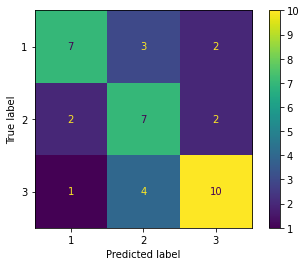

In [43]:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)
plt.show()

## Plotting X_trained data VS Y_trained data

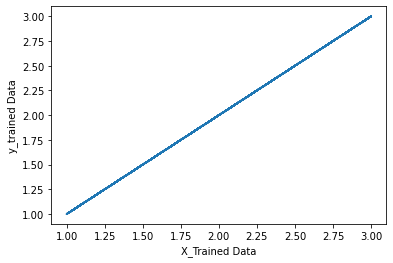

In [44]:
plt.plot(y_train,y_train)
plt.xlabel('X_Trained Data')
plt.ylabel('y_trained Data')
plt.show()

## Plotting Y_tested data VS Y_predicted data

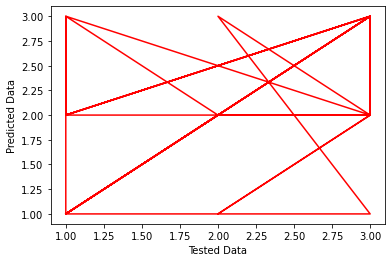

In [45]:
plt.plot(y_test,y_pred,color='red')
plt.xlabel('Tested Data')
plt.ylabel('Predicted Data')
plt.show()

## Plotting Accuracy VS N_estimators

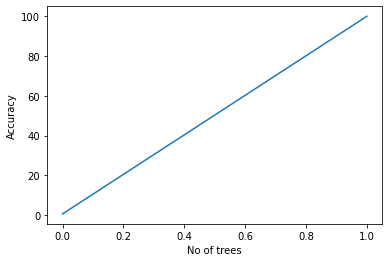

In [46]:
plt.plot((accuracy,100))
plt.xlabel('No of trees')  
plt.ylabel('Accuracy')
plt.show()

# 